In [18]:
#!pip install tensorflow

In [1]:
tf.get_logger().setLevel('ERROR')

NameError: name 'tf' is not defined

In [2]:
import pickle
import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Load data
print("Loading data...")
training_file = './Data/train.p'
#training_file = 'train.p'

# sign_names = read_csv("signname.csv").values[:, 1]
sign_names = read_csv("./Data/signname.csv").values[:, 1]

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
images_train, labels_train = train['features'], train['labels']

# Filter only labels 0-8
mask_0_to_8 = labels_train <= 8
images_train_filtered = images_train[mask_0_to_8]
labels_train_filtered = labels_train[mask_0_to_8]

# Create a model for multi-class classification
model_multi_class = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # Flatten the input

    Dense(128, activation='relu'),  # First fully connected layer
    Dense(64, activation='relu'),   # Second fully connected layer

    # The final Dense layer with 9 neurons for 9 classes (0 to 8) and softmax activation for multi-class classification
    Dense(9, activation='softmax')  # Output layer for multi-class classification (9 classes)
])

Loading data...


In [3]:
# Compile the model for multi-class classification
model_multi_class.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
# Training the model
history = model_multi_class.fit(images_train_filtered, labels_train_filtered, epochs=10, validation_split=0.2)

# Now you can proceed with evaluation or prediction on test/validation data

Loading data...
Epoch 1/10
294/294 [==============================] - 3s 7ms/step - loss: 27.0208 - accuracy: 0.3652 - val_loss: 144.7327 - val_accuracy: 0.0901
Epoch 2/10
294/294 [==============================] - 2s 6ms/step - loss: 6.9697 - accuracy: 0.5405 - val_loss: 225.4476 - val_accuracy: 0.1008
Epoch 3/10
294/294 [==============================] - 2s 7ms/step - loss: 2.9569 - accuracy: 0.6612 - val_loss: 191.3589 - val_accuracy: 0.0859
Epoch 4/10
294/294 [==============================] - 2s 7ms/step - loss: 1.9348 - accuracy: 0.7011 - val_loss: 147.6463 - val_accuracy: 0.1084
Epoch 5/10
294/294 [==============================] - 2s 6ms/step - loss: 1.4722 - accuracy: 0.7450 - val_loss: 171.1502 - val_accuracy: 0.1093
Epoch 6/10
294/294 [==============================] - 2s 6ms/step - loss: 1.2488 - accuracy: 0.7518 - val_loss: 179.9303 - val_accuracy: 0.0914
Epoch 7/10
294/294 [==============================] - 2s 7ms/step - loss: 1.0517 - accuracy: 0.7650 - val_loss: 140.226

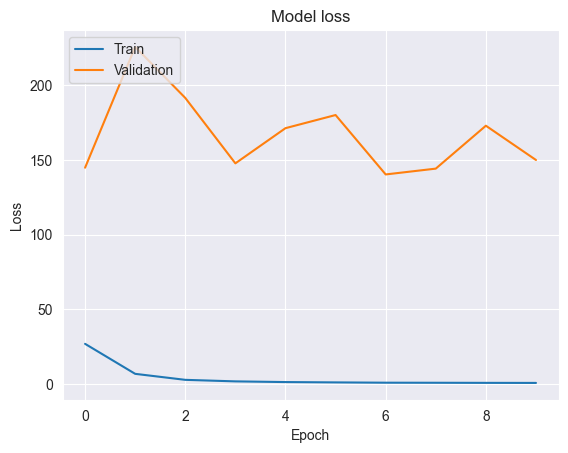

In [7]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

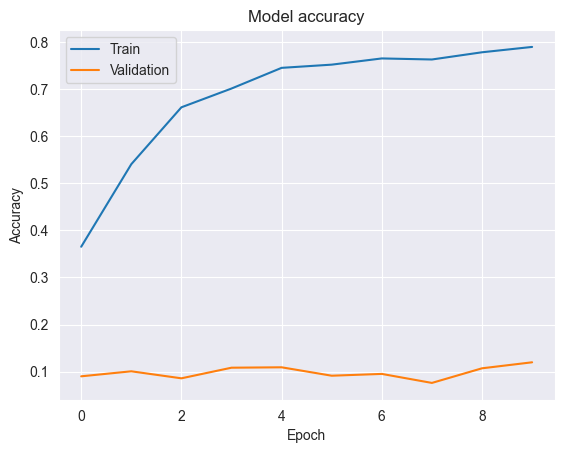

In [8]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
# Load test data
#test_file = './Data/test.p'
test_file = 'test.p'

with open(test_file, mode='rb') as f:
    test = pickle.load(f)
images_test, labels_test = test['features'], test['labels']

# Filter test data for labels 0-8
mask_test_0_to_8 = labels_test <= 8
images_test_filtered = images_test[mask_test_0_to_8]
labels_test_filtered = labels_test[mask_test_0_to_8]

# Evaluate the model on test data
test_loss, test_accuracy = model_multi_class.evaluate(images_test_filtered, labels_test_filtered)
print(f"Test Accuracy: {test_accuracy}")

135/135 [==============================] - 0s 2ms/step - loss: 10.9780 - accuracy: 0.6329
Test Accuracy: 0.6328703761100769


In [9]:
# saving model
with open('experiment_2.pkl', 'wb') as file:
    pickle.dump(model_multi_class, file)